In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path="loan_data.csv")

print("Path to dataset files:", path)

/Users/shubhamagarwal/Desktop/untitled folder/shap-exp/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.44M/3.44M [00:02<00:00, 1.31MB/s]

Path to dataset files: /Users/shubhamagarwal/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/Users/shubhamagarwal/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv")

## EDA

In [6]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
28666,31.0,female,Bachelor,94404.0,5,MORTGAGE,16250.0,VENTURE,10.99,0.17,9.0,690,No,0
34403,28.0,female,Associate,217122.0,8,MORTGAGE,14339.0,MEDICAL,10.24,0.07,5.0,583,No,0
43310,27.0,male,Bachelor,80109.0,3,RENT,7656.0,MEDICAL,12.33,0.10,7.0,567,No,1
8105,23.0,male,Master,75492.0,3,RENT,7200.0,EDUCATION,7.90,0.10,3.0,676,No,1
6649,24.0,male,Master,65668.0,5,RENT,6000.0,EDUCATION,7.14,0.09,3.0,680,No,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
len(df.drop_duplicates())==len(df)

True

In [22]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [13]:
df.isna().sum()/len(df)

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

In [14]:
df.loan_status.value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [15]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [19]:
numerical_cols=df.select_dtypes(np.number).columns.tolist()
categorical_cols=df.select_dtypes("object").columns.tolist()

In [20]:
df[numerical_cols].head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1


In [23]:
from matplotlib.gridspec import GridSpec

In [25]:
def plots_for_num_cols(numerical_col):
    plt.figure(figsize=(12,4))
    grid = GridSpec(nrows=1, ncols=4)
    
    # set the axes
    # boxplot
    ax1 = plt.subplot(grid[:,0])
    # histogram
    ax2 = plt.subplot(grid[:,1:3])
    # violin plot
    ax3 = plt.subplot(grid[:,3])
    
    # create boxplot
    sns.boxplot(data=df, y=numerical_col,ax=ax1)
    # create histogram
    sns.histplot(data=df,x=numerical_col,ax=ax2)
    # create violin plot
    sns.violinplot(data=df,y=numerical_col,ax=ax3)
    plt.tight_layout()
    plt.show()

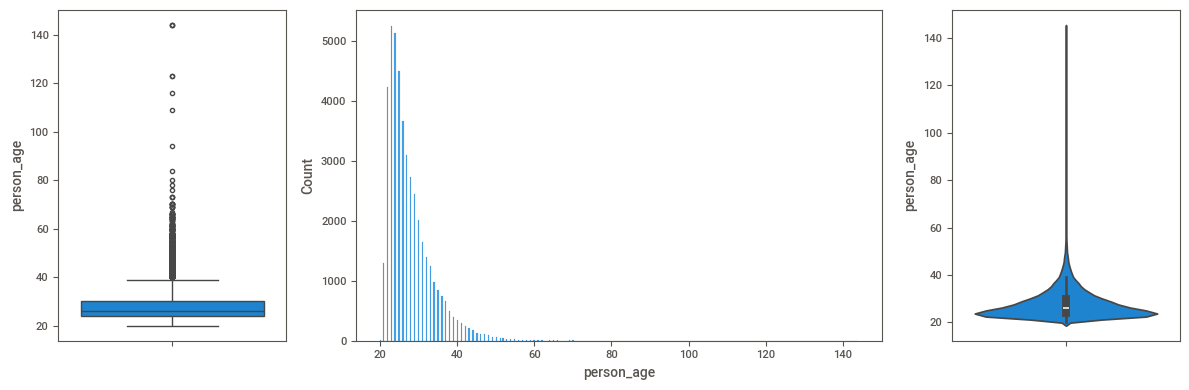

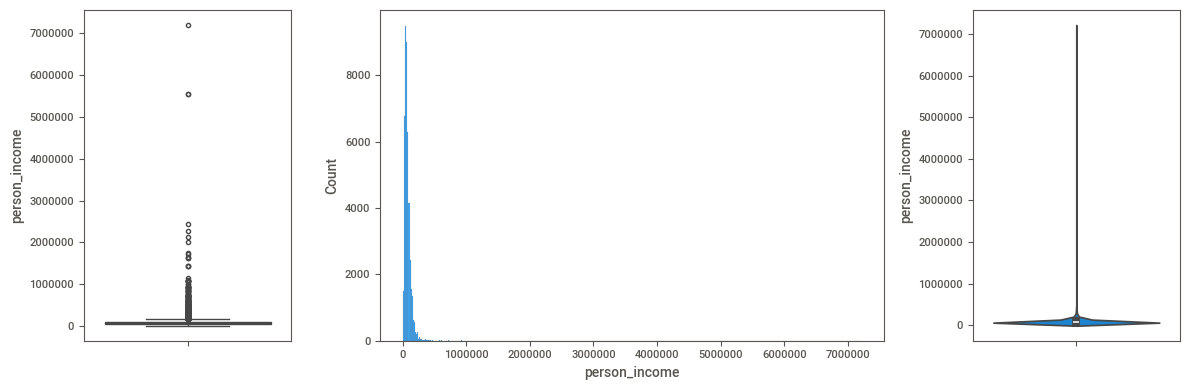

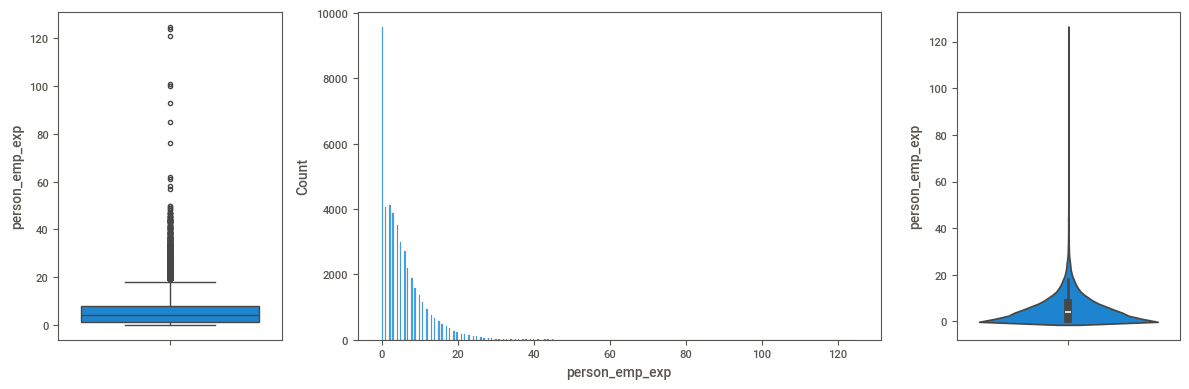

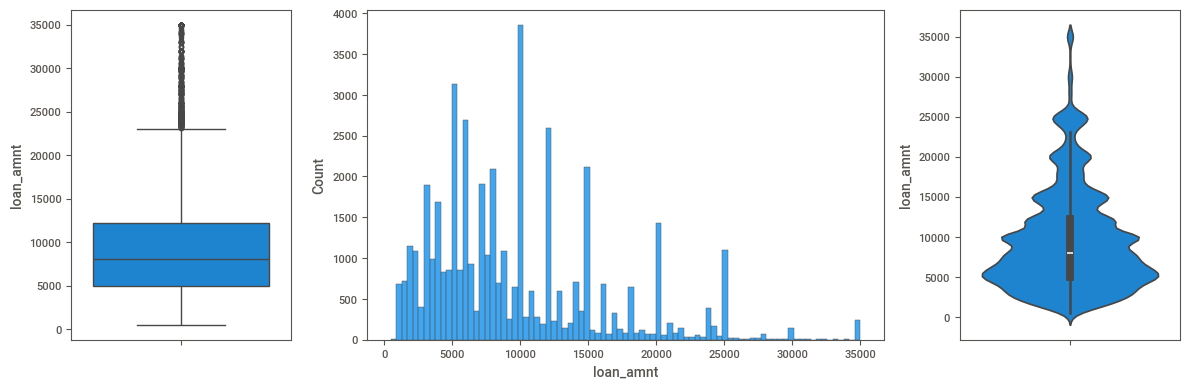

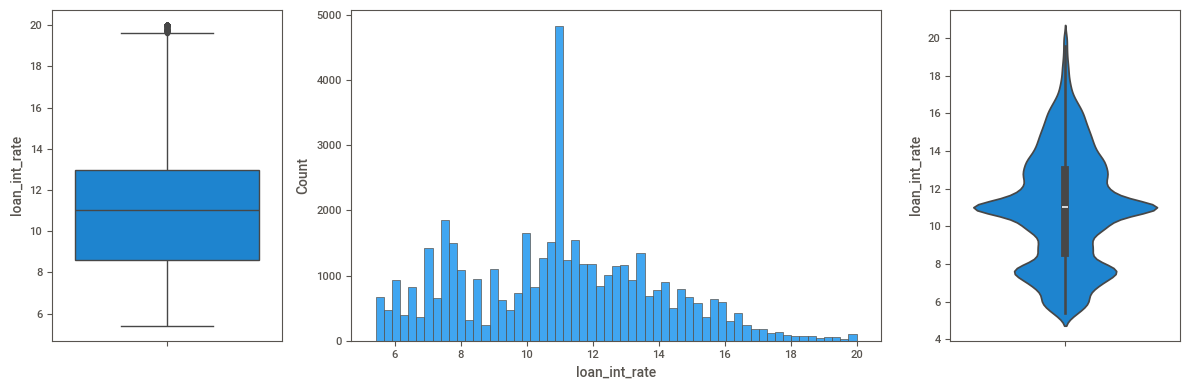

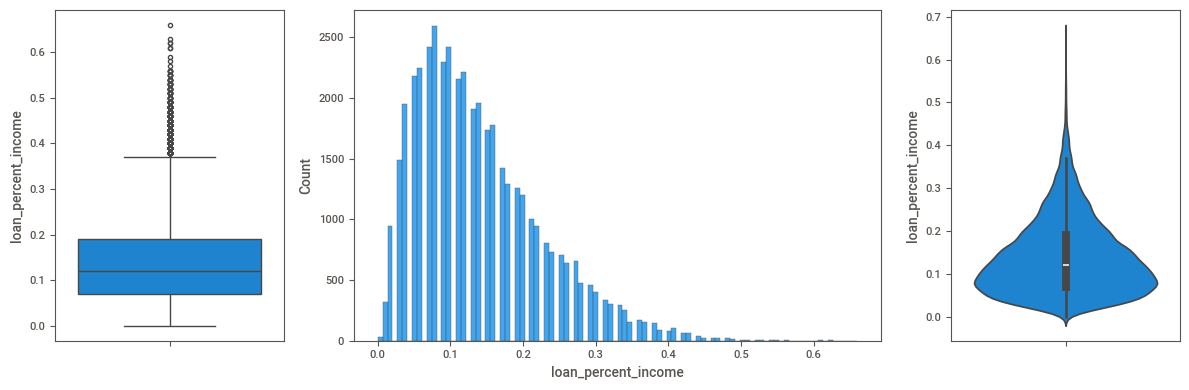

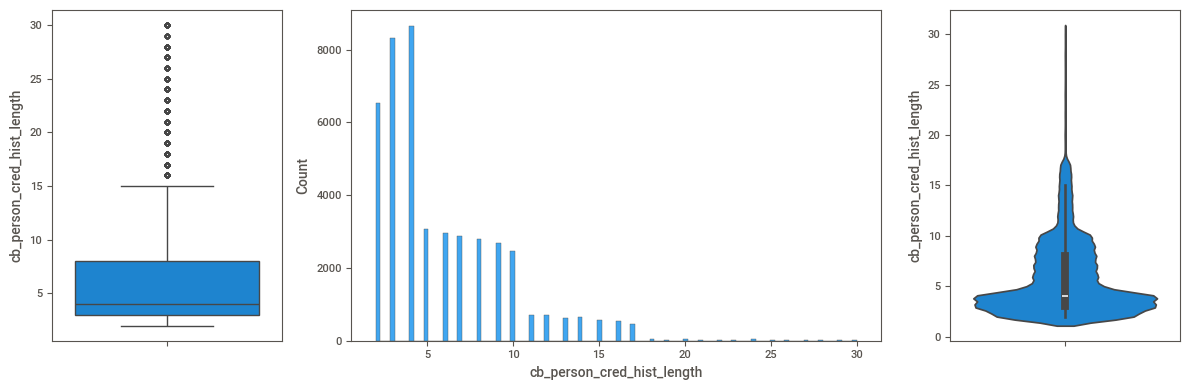

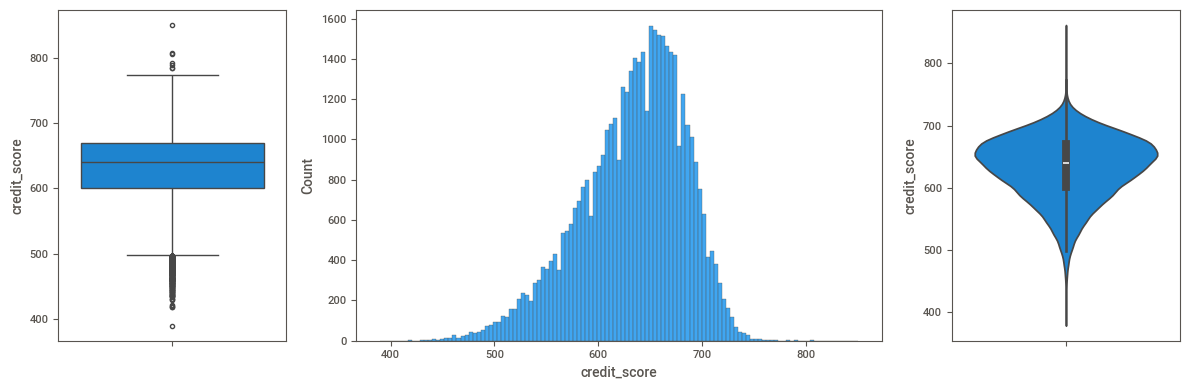

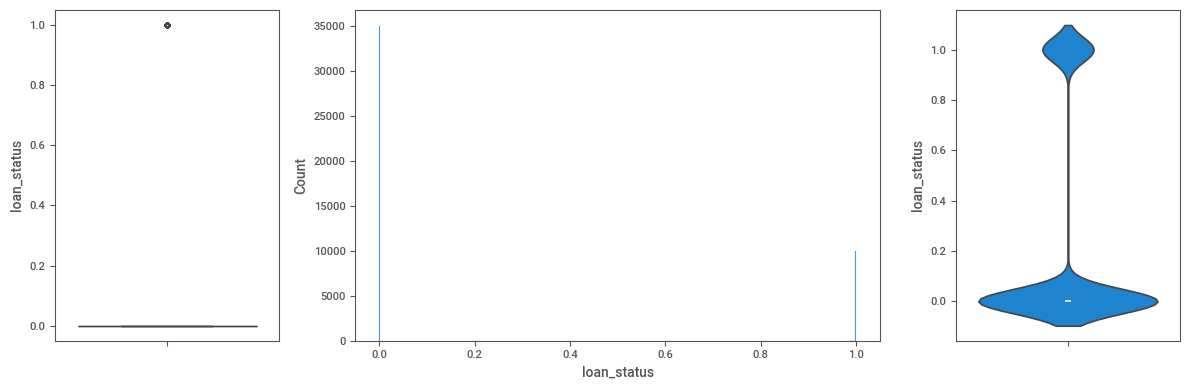

In [26]:
for col in numerical_cols:
    plots_for_num_cols(col)

In [27]:
def plots_for_cat_cols(column_name):
    print(f"Number of unique values in {column_name}: {df[column_name].nunique()}", end="\n\n")
    print(f"Unique values in {column_name}: {df[column_name].unique()}", end="\n\n")
    display(df[column_name].value_counts(normalize=True))
    sns.countplot(data=df, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

Number of unique values in person_gender: 2

Unique values in person_gender: ['female' 'male']



person_gender
male     0.55
female   0.45
Name: proportion, dtype: float64

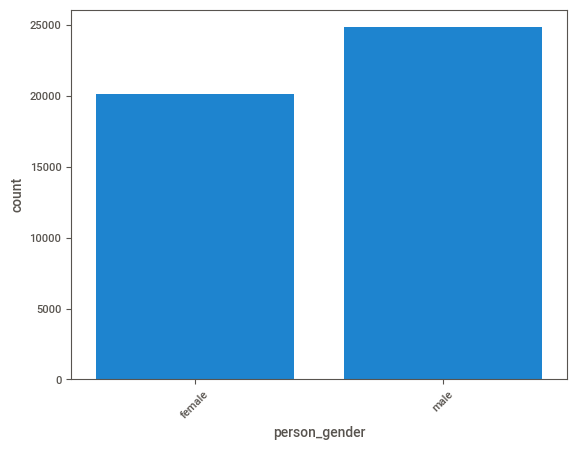

Number of unique values in person_education: 5

Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']



person_education
Bachelor      0.30
Associate     0.27
High School   0.27
Master        0.16
Doctorate     0.01
Name: proportion, dtype: float64

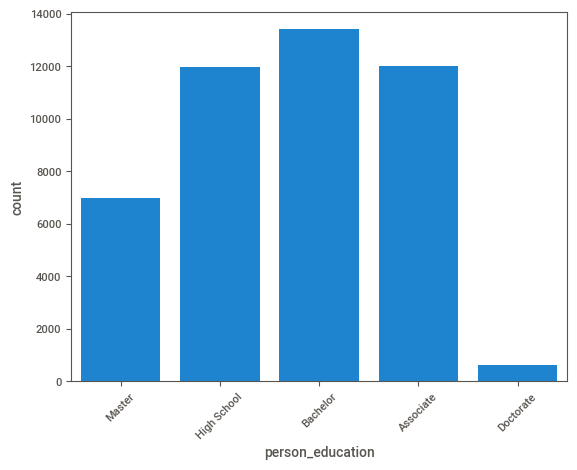

Number of unique values in person_home_ownership: 4

Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']



person_home_ownership
RENT       0.52
MORTGAGE   0.41
OWN        0.07
OTHER      0.00
Name: proportion, dtype: float64

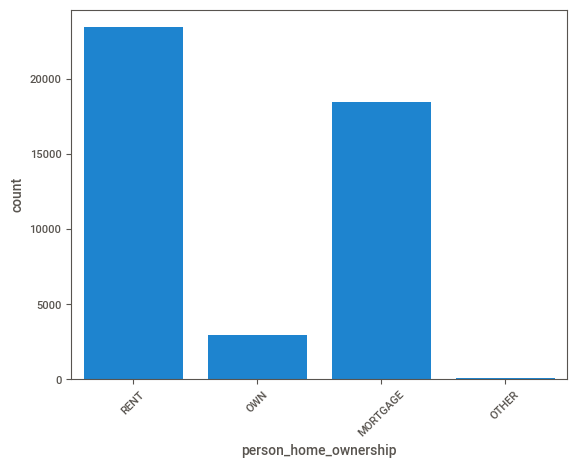

Number of unique values in loan_intent: 6

Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']



loan_intent
EDUCATION           0.20
MEDICAL             0.19
VENTURE             0.17
PERSONAL            0.17
DEBTCONSOLIDATION   0.16
HOMEIMPROVEMENT     0.11
Name: proportion, dtype: float64

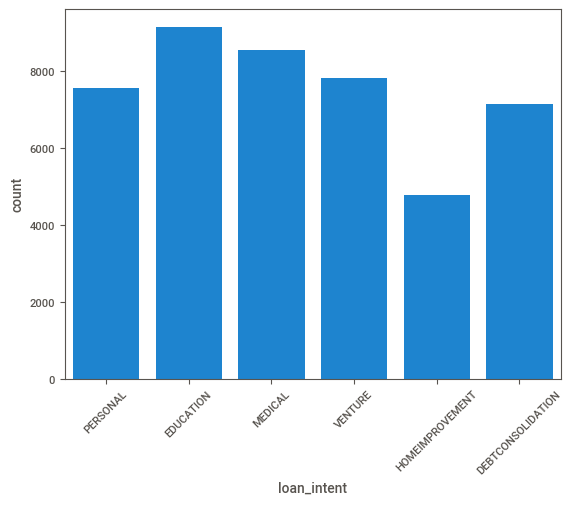

Number of unique values in previous_loan_defaults_on_file: 2

Unique values in previous_loan_defaults_on_file: ['No' 'Yes']



previous_loan_defaults_on_file
Yes   0.51
No    0.49
Name: proportion, dtype: float64

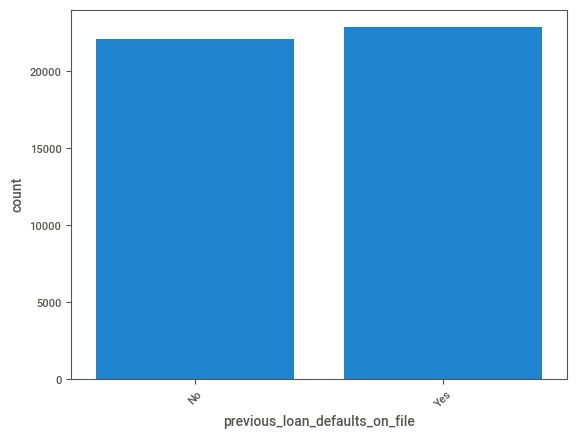

In [28]:
for col in categorical_cols:
    plots_for_cat_cols(col)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer

In [31]:
x,y=df.drop("loan_status",axis=1),df["loan_status"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [85]:
num_cols=x_train.select_dtypes(np.number).columns.tolist()

In [86]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [87]:
cat_cols=x_train.select_dtypes("object").columns.tolist()

In [88]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [89]:
num_pipe = Pipeline(steps=[
    ("outlier", Winsorizer(capping_method="iqr", tail="both", fold=1.5)),
    ("scaling", RobustScaler())
])

num_pipe

,steps,"[('outlier', ...), ('scaling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,capping_method,'iqr'
,tail,'both'
,fold,1.5
,add_indicators,False
,variables,None
,missing_values,'raise'
,with_centering,True


In [90]:
ohe_cols = [x for x in cat_cols  if x !='person_education']

In [91]:
order_of_education = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

In [92]:
preprocessor=ColumnTransformer(transformers=[
    ("num_cols",num_pipe,num_cols),
    ("ohe",OneHotEncoder(drop="first",handle_unknown="ignore"),ohe_cols),
    ("ordinal",OrdinalEncoder(categories=[order_of_education], handle_unknown="use_encoded_value",
                               unknown_value=-1), ["person_education"])
], remainder="passthrough", n_jobs=-1, verbose_feature_names_out=False)


In [93]:
preprocessor

,transformers,"[('num_cols', ...), ('ohe', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,capping_method,'iqr'
,tail,'both'
,fold,1.5


In [94]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

/Users/shubhamagarwal/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/shubhamagarwal/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/shubhamagarwal/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://se

In [95]:
feature_name=preprocessor.get_feature_names_out()
feature_name

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [96]:
x_train

array([[-0.33333333, -0.16634333, -0.28571429, ...,  1.        ,
         1.        ,  3.        ],
       [-0.5       , -0.43195902, -0.28571429, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5       ,  2.09432555,  0.42857143, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66666667,  0.11619795,  0.71428571, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.66666667, -0.55913519,  0.57142857, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667, -0.36995962,  0.14285714, ...,  0.        ,
         0.        ,  3.        ]], shape=(36000, 19))

In [97]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn


In [98]:
class LoanDataset (Dataset):

    def __init__(self,x,y):
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y.tolist(),dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]

In [100]:
train_dataset=LoanDataset(x_train,y_train)
test_dataset=LoanDataset(x_test,y_test)

In [101]:
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=False)

## Model 

In [116]:
class mymodel(nn.Module):

    def __init__(self,input_features):
        super().__init__()

        self.network=nn.Sequential(
            nn.Linear(input_features,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8,1),
            nn.Sigmoid()
        )

    def forward (self,x):
        return self.network(x)

In [117]:
model=mymodel(x_train.shape[1])

In [118]:
print(model)

mymodel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=8, bias=True)
    (7): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=8, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [120]:
loss=nn.BCELoss()

In [121]:
lr=0.01

In [123]:
epochs=20

In [122]:
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [124]:
train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

for epoch in range(epochs):

    epoch_train_loss=0
    epoch_test_loss=0

    for x_batch,y_batch in train_dataloader:

        model.train()
        optimizer.zero_grad()

        y_pred=model(x_batch).squeeze()

        train_loss=loss(y_pred,y_batch.float())

        train_loss.backward()
        optimizer.step()
        epoch_train_loss+=train_loss.item()


    with torch.no_grad():
        for x_batch,y_batch in test_dataloader:

            model.eval()

            y_pred=model(x_batch).squeeze()

            test_loss=loss(y_pred,y_batch.float())

            epoch_test_loss+=test_loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss/train_batches:.4f}, Test Loss: {epoch_test_loss/test_batches:.4f}")


Epoch 1/20, Train Loss: 0.2262, Test Loss: 0.1928
Epoch 2/20, Train Loss: 0.2019, Test Loss: 0.1884
Epoch 3/20, Train Loss: 0.1995, Test Loss: 0.1831
Epoch 4/20, Train Loss: 0.1974, Test Loss: 0.1816
Epoch 5/20, Train Loss: 0.1938, Test Loss: 0.1837
Epoch 6/20, Train Loss: 0.1922, Test Loss: 0.1858
Epoch 7/20, Train Loss: 0.1912, Test Loss: 0.1742
Epoch 8/20, Train Loss: 0.1916, Test Loss: 0.1784
Epoch 9/20, Train Loss: 0.1895, Test Loss: 0.1801
Epoch 10/20, Train Loss: 0.1898, Test Loss: 0.1753
Epoch 11/20, Train Loss: 0.1879, Test Loss: 0.1776
Epoch 12/20, Train Loss: 0.1865, Test Loss: 0.1800
Epoch 13/20, Train Loss: 0.1860, Test Loss: 0.1749
Epoch 14/20, Train Loss: 0.1842, Test Loss: 0.1778
Epoch 15/20, Train Loss: 0.1850, Test Loss: 0.1744
Epoch 16/20, Train Loss: 0.1830, Test Loss: 0.1748
Epoch 17/20, Train Loss: 0.1853, Test Loss: 0.1781
Epoch 18/20, Train Loss: 0.1837, Test Loss: 0.1801
Epoch 19/20, Train Loss: 0.1835, Test Loss: 0.1761
Epoch 20/20, Train Loss: 0.1826, Test Lo

In [125]:
from sklearn.metrics import classification_report

In [126]:
model.eval()

mymodel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=8, bias=True)
    (7): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=8, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [130]:
train_preds=[]

train_preds=model(torch.tensor(x_train,dtype=torch.float32)).squeeze().detach().numpy()
y_train_array=y_train.to_numpy()
print(classification_report(y_train_array, (train_preds>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     28000
           1       0.87      0.78      0.82      8000

    accuracy                           0.92     36000
   macro avg       0.90      0.87      0.89     36000
weighted avg       0.92      0.92      0.92     36000



In [131]:
test_preds=[]
test_preds=model(torch.tensor(x_test,dtype=torch.float32)).squeeze().detach().numpy()
y_test_array=y_test.to_numpy()
print(classification_report(y_test_array, (test_preds>0.5).astype(int)))    

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.86      0.77      0.82      2000

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000

